In [1]:
import pandas as pd
import numpy as np

# Read X data set into a pandas DataFrame named X
X = pd.read_csv('X.csv')

# show the features of X
print ("--------------------------------------------------------------------------------------")
print("Mean value of Device statistics:")
pd.set_option("display.precision", 4)
print(np.round(X.mean(), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("Maximum value of Device statistics:")
print(np.round(X.max(), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("Minimum value of Device statistics:")
print(np.round(X.min(), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("25th percentile of Device statistics:")
print(np.round(X.quantile(.25), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("90th percentile of Device statistics:")
print(np.round(X.quantile(.90), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("standard deviation of Device statistics:")
print(np.round(X.std(), decimals=2))
print ("--------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------
Mean value of Device statistics:
plist-sz     8.7569e+02
totsck       4.8452e+02
ldavg-1      7.3300e+01
pgfree/s     1.5023e+05
proc/s       8.0000e+00
all_%%usr    8.6220e+01
file-nr      2.5805e+03
cswch/s      5.2520e+04
%%memused    1.3270e+01
runq-sz      6.3410e+01
TimeStamp    1.4092e+09
dtype: float64
--------------------------------------------------------------------------------------
Maximum value of Device statistics:
plist-sz     1.4120e+03
totsck       7.4400e+02
ldavg-1      1.5593e+02
pgfree/s     8.6503e+05
proc/s       5.8000e+01
all_%%usr    9.8080e+01
file-nr      2.9760e+03
cswch/s      8.4703e+04
%%memused    1.7600e+01
runq-sz      1.5000e+02
TimeStamp    1.4092e+09
dtype: float64
--------------------------------------------------------------------------------------
Minimum value of Device statistics:
plist-sz     4.0400e+02
totsck       2.4100e+02
ldavg-1      1.7900e+00
pgfr

In [2]:
import pandas as pd
import numpy as np

# Read Y data set into a pandas DataFrame named Y
Y = pd.read_csv('Y.csv')

# show the features of Y
print ("--------------------------------------------------------------------------------------")
print("Mean value of Device statistics:")
pd.set_option("display.precision", 4)
print(np.round(Y.mean(), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("Maximum value of Device statistics:")
print(np.round(Y.max(), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("Minimum value of Device statistics:")
print(np.round(Y.min(), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("25th percentile of Device statistics:")
print(np.round(Y.quantile(.25), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("90th percentile of Device statistics:")
print(np.round(Y.quantile(.90), decimals=2))
print ("--------------------------------------------------------------------------------------")

print("standard deviation of Device statistics:")
print(np.round(Y.std(), decimals=2))
print ("--------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------
Mean value of Device statistics:
Unnamed: 0    1.7995e+03
DispFrames    1.8880e+01
TimeStamp     1.4092e+09
dtype: float64
--------------------------------------------------------------------------------------
Maximum value of Device statistics:
Unnamed: 0    3.5990e+03
DispFrames    3.0220e+01
TimeStamp     1.4092e+09
dtype: float64
--------------------------------------------------------------------------------------
Minimum value of Device statistics:
Unnamed: 0    0.0000e+00
DispFrames    0.0000e+00
TimeStamp     1.4092e+09
dtype: float64
--------------------------------------------------------------------------------------
25th percentile of Device statistics:
Unnamed: 0    8.9975e+02
DispFrames    1.3390e+01
TimeStamp     1.4092e+09
Name: 0.25, dtype: float64
--------------------------------------------------------------------------------------
90th percentile of Device statistics:
Unnamed: 0  

In [3]:
small_90 = X[X['all_%%usr'] < 90]
mu_50=small_90[small_90['%%memused']<50]
print("the number of cpu utilization smaller than 90% and memory utilization small than 50%:", len(mu_50) )
 

the number of cpu utilization smaller than 90% and memory utilization small than 50%: 1114


In [4]:
csw_less_60000=X[X['cswch/s']<60000]
print('average number of used sockets ("totsck") for observations with less than 60000 context switches per seconds ("cswch/s")', csw_less_60000['totsck'].mean() )

average number of used sockets ("totsck") for observations with less than 60000 context switches per seconds ("cswch/s") 356.1242564441507


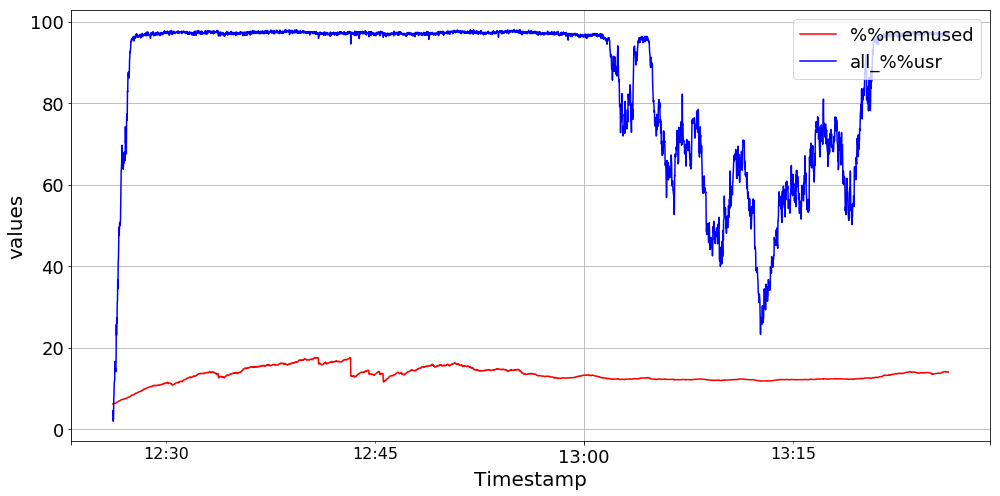

In [19]:
# Use TimeStamp as index for X, instead of 0,1, ... 
# Convert TimeStamp into date-time format
timeIndex=pd.to_datetime(X['TimeStamp'], unit='s')
X.index=timeIndex

import matplotlib.pyplot as plt

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

# Produce the plots for specified features sets
que = X['%%memused'].plot(color='r')
ld = X['all_%%usr'].plot(color='b')
axes.grid(True)


# Customizing plot (changing font size, labels)
font_size = 20
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('values', fontsize=font_size)
plt.legend(('%%memused','all_%%usr'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.show()

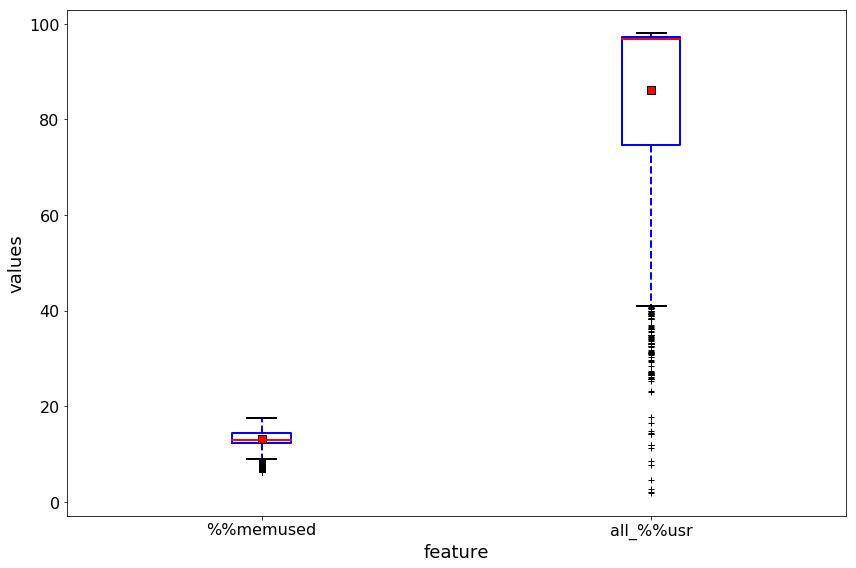

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
mem = X['%%memused']
usr=X['all_%%usr']
bp = axes.boxplot([mem,usr])

# Add an square box for average value
plt.plot(1,X['%%memused'].mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.plot(2,X['all_%%usr'].mean(),'s', markersize=8, markerfacecolor='red', markeredgecolor='black')
### Customizing Boxes

# Change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='blue', linewidth=2)

# Change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2, linestyle='dashed')

# Change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#000000', linewidth=2)

# Change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red', linewidth=2)

# change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='blue', alpha=1)
    
# Customizing plot (changing font size, labels)
font_size = 18
axes.set_xticklabels(['%%memused','all_%%usr'])
plt.xlabel('feature', fontsize=font_size)
plt.ylabel('values', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.show()


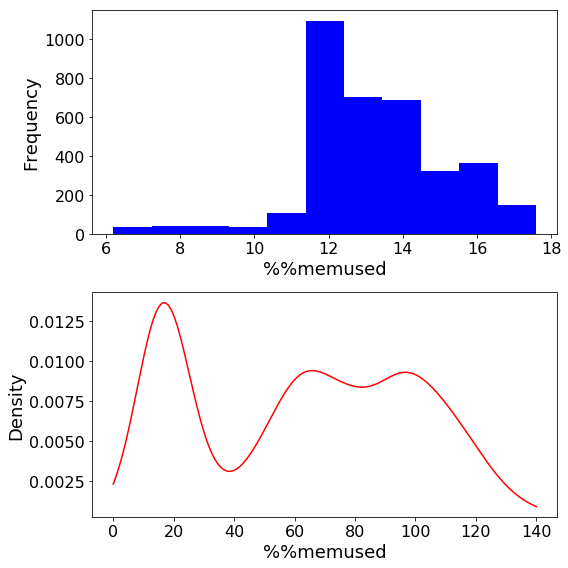

In [7]:
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram plot
n_bins = int(X['%%memused'].max()-X['%%memused'].min()) 
axes[0].hist(X['%%memused'],bins=n_bins,color='b')

# Customizing plot (changing font size, labels)
font_size = 18
axes[0].set_xlabel('%%memused', fontsize=font_size)
axes[0].set_ylabel('Frequency', fontsize=font_size)
axes[0].tick_params(axis='both', which='major', labelsize=font_size-2)
axes[0].tick_params(axis='both', which='minor', labelsize=font_size-4)

#Density plot

X['runq-sz'].plot.kde(ind=np.linspace(0,140,139), color='r');

# Customizing plot (changing font size, labels)
font_size = 18
axes[1].set_xlabel('%%memused', fontsize=font_size)
axes[1].set_ylabel('Density', fontsize=font_size)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-2)
axes[1].tick_params(axis='both', which='minor', labelsize=font_size-4)

#plt.rcParams['savefig.dpi'] = 200
#plt.savefig(path)
plt.tight_layout()
plt.show()

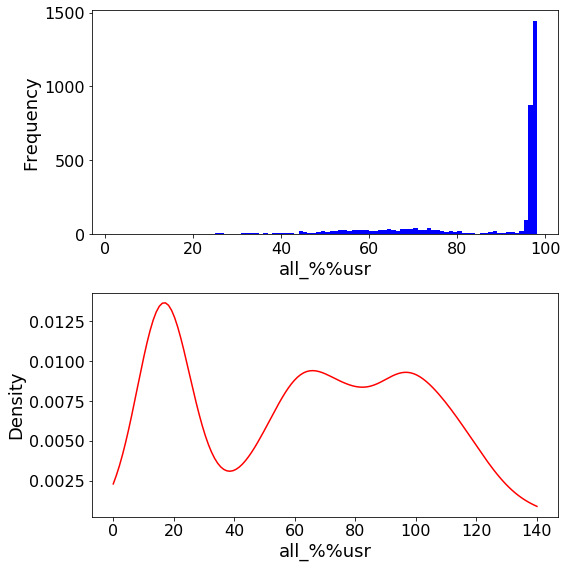

In [8]:
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram plot
n_bins = int(X['all_%%usr'].max()-X['all_%%usr'].min()) 
axes[0].hist(X['all_%%usr'],bins=n_bins,color='b')

# Customizing plot (changing font size, labels)
font_size = 18
axes[0].set_xlabel('all_%%usr', fontsize=font_size)
axes[0].set_ylabel('Frequency', fontsize=font_size)
axes[0].tick_params(axis='both', which='major', labelsize=font_size-2)
axes[0].tick_params(axis='both', which='minor', labelsize=font_size-4)

#Density plot

X['runq-sz'].plot.kde(ind=np.linspace(0,140,139), color='r');

# Customizing plot (changing font size, labels)
font_size = 18
axes[1].set_xlabel('all_%%usr', fontsize=font_size)
axes[1].set_ylabel('Density', fontsize=font_size)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-2)
axes[1].tick_params(axis='both', which='minor', labelsize=font_size-4)

#plt.rcParams['savefig.dpi'] = 200
#plt.savefig(path)
plt.tight_layout()
plt.show()

In [9]:
#TASK2,1.a
# Read external data into the program

import pandas as pd

# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')


# Producing training set and test set


# Here is how you can create a single frame with selected columns

X_features = ['runq-sz','%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr']
XY = pd.concat([X[X_features], Y['DispFrames']], axis=1)


# Split XY into training set and test set of equal size

from sklearn.model_selection import train_test_split
train, test = train_test_split(XY, test_size = 0.3)

# Sort the train and test sets after index (which became unsorted through sampling)
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
X_train = train[X_features]; X_test = test[X_features]
Y_train = train['DispFrames']; Y_test = test['DispFrames']


# Computing and evaluating a linear model

import numpy as np

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_train, Y_train)

# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)



Coefficients: [-1.02e-02  4.03e-01 -4.42e-03 -7.56e-05  8.54e-02 -5.06e-03  3.12e-03
 -6.48e-06 -1.55e-02 -3.64e-03]
Intercept: 33.6631032839543


test size: 1080
MAE 2.009737182020341
NMAE 0.10741579497432639


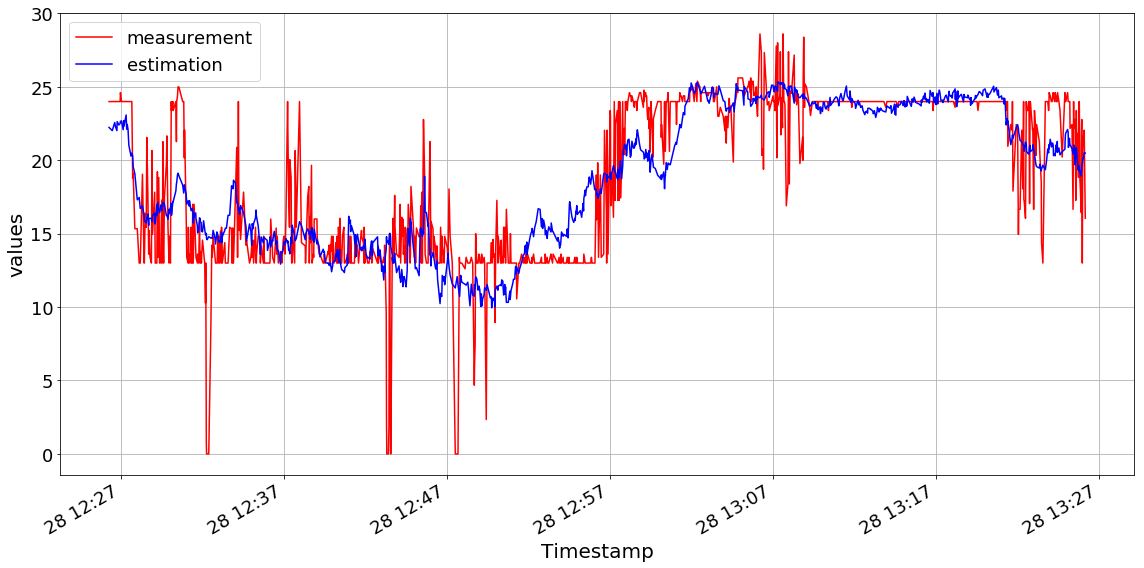

In [10]:
# Read external data into the program

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
from pandas import DataFrame

# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')
# Producing training set and test set


# Here is how you can create a single frame with selected columns

X_features = ['runq-sz','%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr']
XY = pd.concat([X[X_features], Y['DispFrames']], axis=1)


# Split XY into training set and test set of equal size


train, test = train_test_split(XY, test_size = 0.3)
print("test size:",len(test))

# Sort the train and test sets after index (which became unsorted through sampling)
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
X_train = train[X_features]; X_test = test[X_features]
Y_train = train['DispFrames']; Y_test = test['DispFrames']
# Computing and evaluating a linear model



# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_train, Y_train)

#calculate NMAE
Y_pred = regr.predict(X_test)
MAE=metrics.mean_absolute_error(Y_test, Y_pred)
print('MAE',MAE)
y=Y_pred.mean()
NMAE=MAE/y
print('NMAE',NMAE)

#time series plot
result=pd.concat([Y,Y_test],axis=1,join='inner')
timeIndex=pd.to_datetime(result['TimeStamp'],unit='s')
Y_pred_new=pd.Series(Y_pred)
Y_pred_new.index=timeIndex
Y_test.index=pd.to_datetime(result['TimeStamp'],unit='s')

fig,axes=plt.subplots(nrows=1,ncols=1, figsize=(16,8))
measurement= Y_test.plot(color='r')

estimations = Y_pred_new.plot(color='b')
axes.grid(True)

# Customizing plot (changing font size, labels)
font_size = 20
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('values', fontsize=font_size)
plt.legend(('measurement','estimation'), loc = 'upper left', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.show()

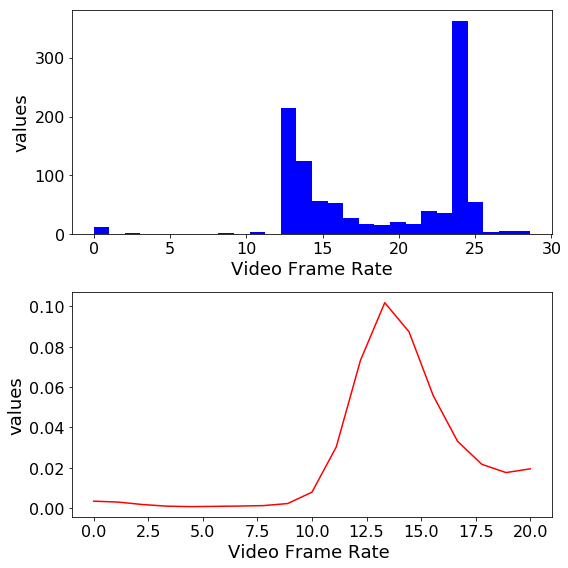

In [11]:
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram plot
n_bins =int(Y_test.max()-Y_test.min()) 
axes[0].hist(Y_test,bins=n_bins,color='b')

# Customizing plot (changing font size, labels)
font_size = 18
axes[0].set_xlabel('Video Frame Rate', fontsize=font_size)
axes[0].set_ylabel('values', fontsize=font_size)
axes[0].tick_params(axis='both', which='major', labelsize=font_size-2)
axes[0].tick_params(axis='both', which='minor', labelsize=font_size-4)

#Density plot

Y_test.plot.kde(ind=np.linspace(0,20,19), color='r');

# Customizing plot (changing font size, labels)
font_size = 18
axes[1].set_xlabel('Video Frame Rate ', fontsize=font_size)
axes[1].set_ylabel('values', fontsize=font_size)
axes[1].tick_params(axis='both', which='major', labelsize=font_size-2)
axes[1].tick_params(axis='both', which='minor', labelsize=font_size-4)

#plt.rcParams['savefig.dpi'] = 200
#plt.savefig(path)
plt.tight_layout()
plt.show()

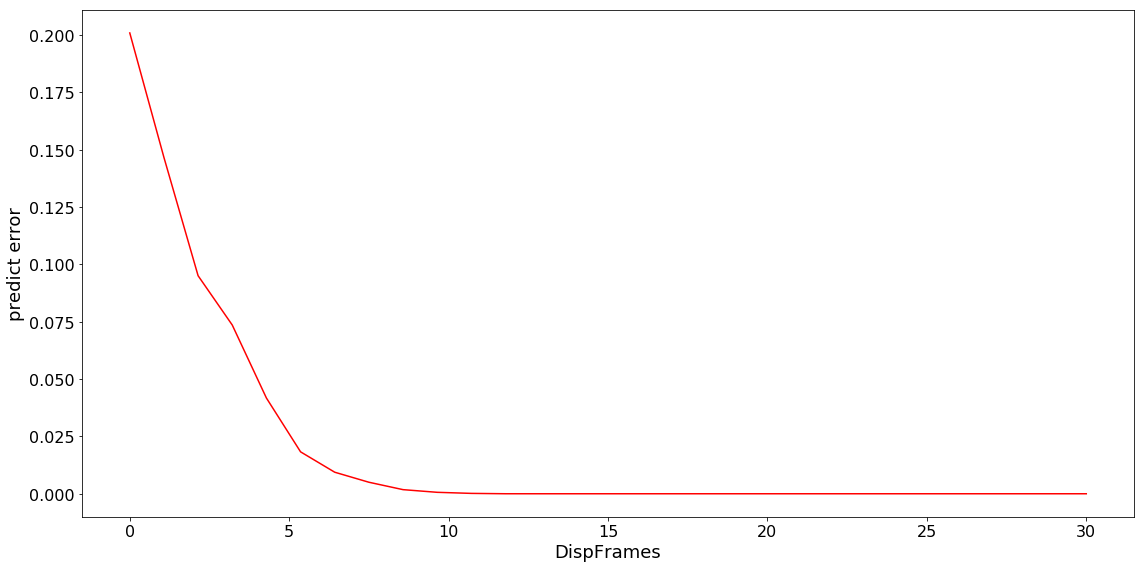

In [12]:
import numpy as np
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

error=Y_test-Y_pred

#Density plot

error.plot.kde(ind=np.linspace(0,30,29), color='r');

# Customizing plot (changing font size, labels)
font_size = 18
axes.set_xlabel('DispFrames', fontsize=font_size)
axes.set_ylabel('predict error', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)

#plt.rcParams['savefig.dpi'] = 200
#plt.savefig(path)
plt.tight_layout()
plt.show()

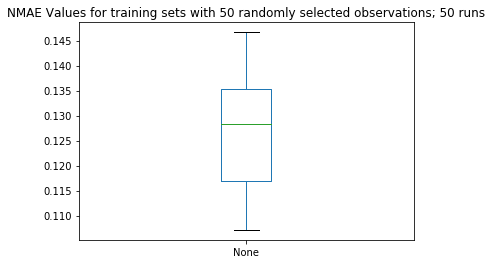

In [13]:
# Producing models for randomly selected training sets

# Produce a training set using 100 random sample from X train
# Evaluate the model on the test set X_test, Y_test by computing MSE
# Perform the above 50 times

# define the result vector for the evaluation
import pandas as pd
NMAE = pd.Series(index=range(0,50))

for i in range(0, 50):
    # Split X,Y into training set and test set
    sub_train,sub_test = train_test_split(train, test_size = 2470./2520.)

    # Split train and test sets into X,Y components
    X_sub_train =sub_train[X_features];
    Y_sub_train =sub_train['DispFrames']; 

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_sub_train, Y_sub_train)

    # Compute M
    Y_pred = regr.predict(X_test)
    MAE=metrics.mean_absolute_error(Y_test, Y_pred)
    NMAE[i]=MAE/Y_pred.mean()
    


# Show the distribution of the MSE values
import matplotlib.pyplot as plt
NMAE.plot.box(title="NMAE Values for training sets with 50 randomly selected observations; 50 runs"); plt.show()

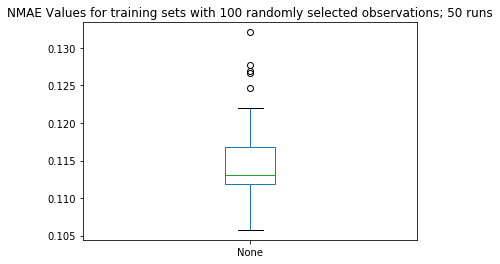

In [14]:
# Producing models for randomly selected training sets

# Produce a training set using 100 random sample from X train
# Evaluate the model on the test set X_test, Y_test by computing MSE
# Perform the above 50 times

# define the result vector for the evaluation
import pandas as pd
NMAE = pd.Series(index=range(0,50))

for i in range(0, 50):
    # Split X,Y into training set and test set
    sub_train,sub_test = train_test_split(train, test_size = 2420./2520.)

    # Split train and test sets into X,Y components
    X_sub_train =sub_train[X_features];
    Y_sub_train =sub_train['DispFrames']; 

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_sub_train, Y_sub_train)

    # Compute M
    Y_pred = regr.predict(X_test)
    MAE=metrics.mean_absolute_error(Y_test, Y_pred)
    NMAE[i]=MAE/Y_pred.mean()
    


# Show the distribution of the MSE values
import matplotlib.pyplot as plt
NMAE.plot.box(title="NMAE Values for training sets with 100 randomly selected observations; 50 runs"); plt.show()

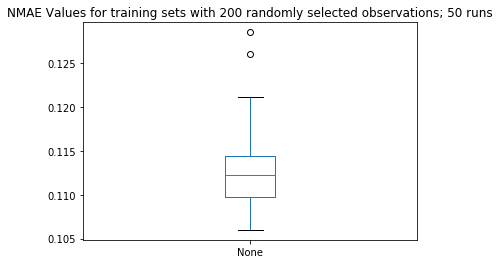

In [15]:
# Producing models for randomly selected training sets

# Produce a training set using 100 random sample from X train
# Evaluate the model on the test set X_test, Y_test by computing MSE
# Perform the above 50 times

# define the result vector for the evaluation
import pandas as pd
NMAE = pd.Series(index=range(0,50))

for i in range(0, 50):
    # Split X,Y into training set and test set
    sub_train,sub_test = train_test_split(train, test_size = 2320./2520.)

    # Split train and test sets into X,Y components
    X_sub_train =sub_train[X_features];
    Y_sub_train =sub_train['DispFrames']; 

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_sub_train, Y_sub_train)

    # Compute M
    Y_pred = regr.predict(X_test)
    MAE=metrics.mean_absolute_error(Y_test, Y_pred)
    NMAE[i]=MAE/Y_pred.mean()
    


# Show the distribution of the MSE values
import matplotlib.pyplot as plt
NMAE.plot.box(title="NMAE Values for training sets with 200 randomly selected observations; 50 runs"); plt.show()

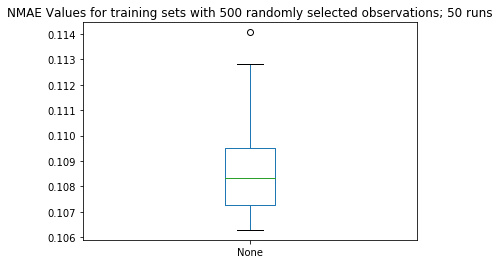

In [16]:
# Producing models for randomly selected training sets

# Produce a training set using 100 random sample from X train
# Evaluate the model on the test set X_test, Y_test by computing MSE
# Perform the above 50 times

# define the result vector for the evaluation
import pandas as pd
NMAE = pd.Series(index=range(0,50))

for i in range(0, 50):
    # Split X,Y into training set and test set
    sub_train,sub_test = train_test_split(train, test_size = 2020./2520.)

    # Split train and test sets into X,Y components
    X_sub_train =sub_train[X_features];
    Y_sub_train =sub_train['DispFrames']; 

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_sub_train, Y_sub_train)

    # Compute M
    Y_pred = regr.predict(X_test)
    MAE=metrics.mean_absolute_error(Y_test, Y_pred)
    NMAE[i]=MAE/Y_pred.mean()
    


# Show the distribution of the MSE values
import matplotlib.pyplot as plt
NMAE.plot.box(title="NMAE Values for training sets with 500 randomly selected observations; 50 runs"); plt.show()

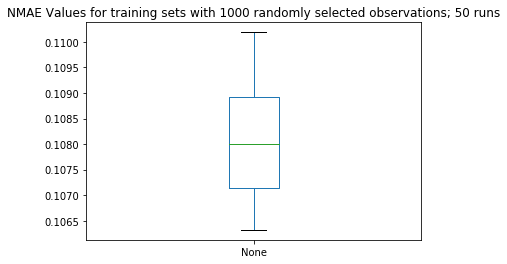

In [17]:
# Producing models for randomly selected training sets

# Produce a training set using 100 random sample from X train
# Evaluate the model on the test set X_test, Y_test by computing MSE
# Perform the above 50 times

# define the result vector for the evaluation
import pandas as pd
NMAE = pd.Series(index=range(0,50))

for i in range(0, 50):
    # Split X,Y into training set and test set
    sub_train,sub_test = train_test_split(train, test_size = 1520./2520.)

    # Split train and test sets into X,Y components
    X_sub_train =sub_train[X_features];
    Y_sub_train =sub_train['DispFrames']; 

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_sub_train, Y_sub_train)

    # Compute M
    Y_pred = regr.predict(X_test)
    MAE=metrics.mean_absolute_error(Y_test, Y_pred)
    NMAE[i]=MAE/Y_pred.mean()
    


# Show the distribution of the MSE values
import matplotlib.pyplot as plt
NMAE.plot.box(title="NMAE Values for training sets with 1000 randomly selected observations; 50 runs"); plt.show()

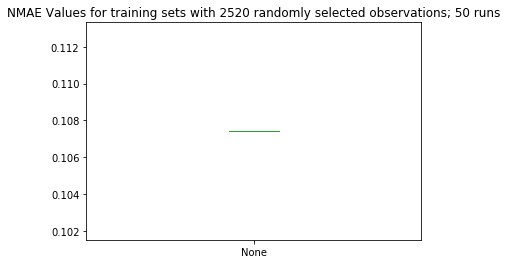

In [18]:
# Producing models for randomly selected training sets

# Produce a training set using 100 random sample from X train
# Evaluate the model on the test set X_test, Y_test by computing MSE
# Perform the above 50 times

# define the result vector for the evaluation
import pandas as pd
NMAE = pd.Series(index=range(0,50))

for i in range(0, 50):
    # Split X,Y into training set and test set
    sub_train=train
    sub_test=test

    # Split train and test sets into X,Y components
    X_sub_train =sub_train[X_features];
    Y_sub_train =sub_train['DispFrames']; 

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_sub_train, Y_sub_train)

    # Compute M
    Y_pred = regr.predict(X_test)
    MAE=metrics.mean_absolute_error(Y_test, Y_pred)
    NMAE[i]=MAE/Y_pred.mean()
    


# Show the distribution of the MSE values
import matplotlib.pyplot as plt
NMAE.plot.box(title="NMAE Values for training sets with 2520 randomly selected observations; 50 runs");
plt.show()